In [2]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load the Diabetes Dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='disease_progression')

Dataset Shape: (442, 10)

First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target variable statistics:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: disease_progression, dtype: float64

Feature statistics:
                age           sex     

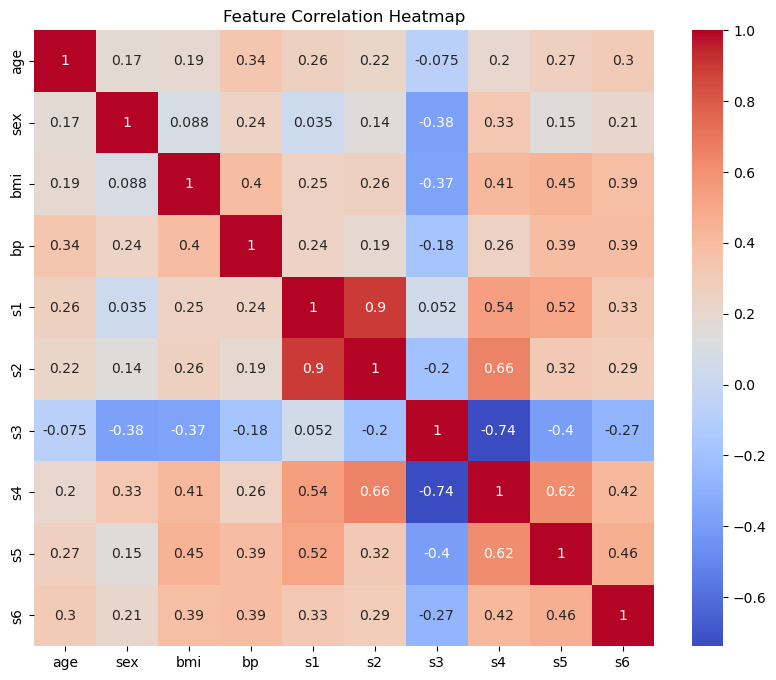

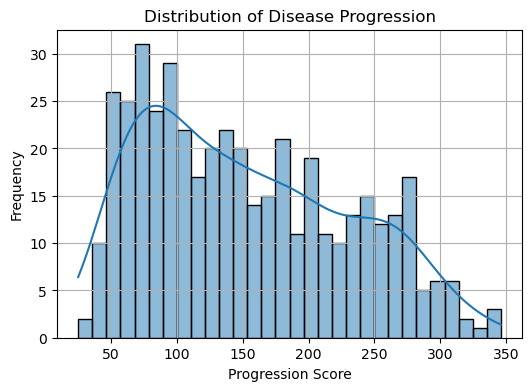


Missing values check:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [3]:
# Step 3: Simple EDA
print("Dataset Shape:", X.shape)
print("\nFirst 5 rows of the dataset:")
print(X.head())

print("\nTarget variable statistics:")
print(y.describe())

print("\nFeature statistics:")
print(X.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Check distribution of the target
plt.figure(figsize=(6, 4))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Disease Progression")
plt.xlabel("Progression Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 4: Preprocess the Data
# Check for missing values
print("\nMissing values check:")
print(X.isnull().sum())


--- Linear Regression ---
MSE: 2900.1936284934827
R2 Score: 0.45260276297191926

--- Decision Tree Regressor ---
MSE: 4887.0
R2 Score: 0.077602863797119
3/3 [==============================] - 0s 0s/step

--- ANN Model ---
MSE: 2978.883304294748
R2 Score: 0.43775047494085306


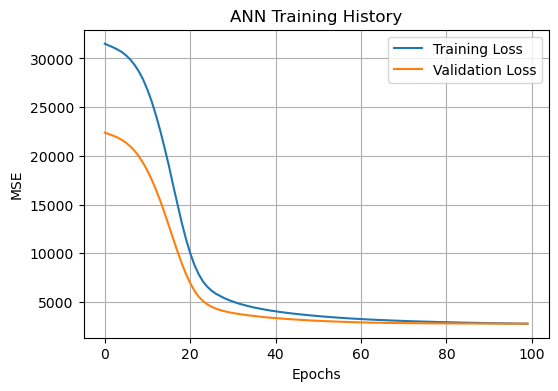

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("\n--- Linear Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Step 6: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("\n--- Decision Tree Regressor ---")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

# Step 7: Artificial Neural Network (ANN)
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse')

history = ann_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

y_pred_ann = ann_model.predict(X_test_scaled).flatten()

print("\n--- ANN Model ---")
print("MSE:", mean_squared_error(y_test, y_pred_ann))
print("R2 Score:", r2_score(y_test, y_pred_ann))

# Plot Training History
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('ANN Training History')
plt.legend()
plt.grid(True)
plt.show()

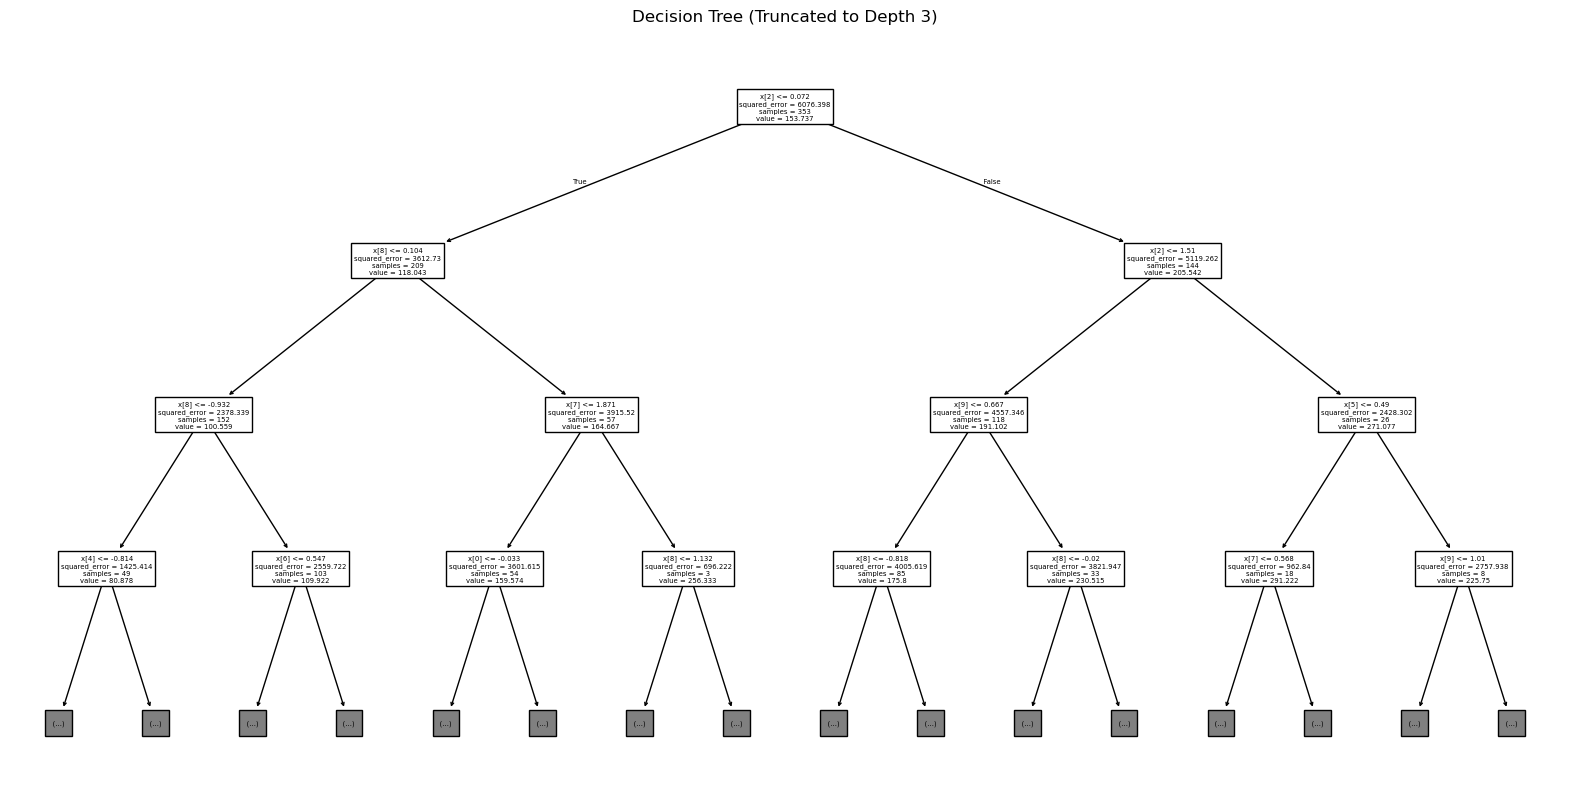

In [9]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3)
plt.title("Decision Tree (Truncated to Depth 3)")
plt.show()


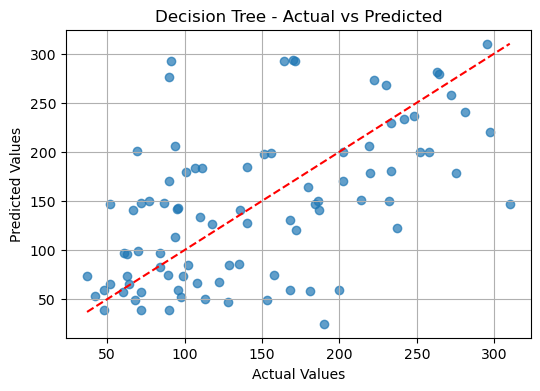

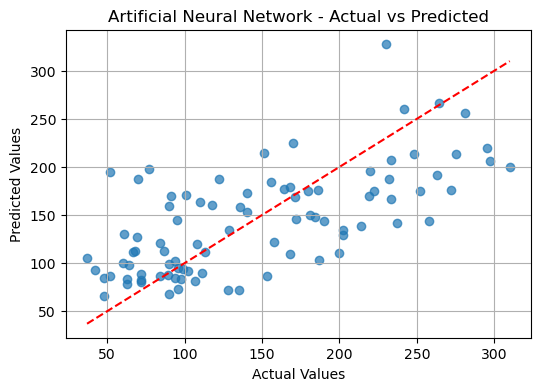

In [7]:
# Function to plot Actual vs Predicted
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

# Decision Tree Predictions
plot_predictions(y_test, y_pred_dt, "Decision Tree")

# ANN Predictions
plot_predictions(y_test, y_pred_ann, "Artificial Neural Network")
